### Q.1: Check how many duplicate rows are present 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('loan_sanction.xlsx')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban


In [22]:
num_rows, num_columns = data.shape
print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_columns}')

Number of Rows: 370
Number of Columns: 12


In [11]:
duplicate_rows = data[data.duplicated()]
print('Duplicate Rows:')
print(duplicate_rows)
print('\n\nTotal Duplicate Rows:', duplicate_rows.shape[0])

Duplicate Rows:
      Loan_ID Gender Married Dependents     Education Self_Employed  \
5    LP001051   Male      No          0  Not Graduate            No   
59   LP001321   Male     Yes          2      Graduate            No   
330  LP002805   Male     Yes          2      Graduate            No   

    Applicant_Income  Coapplicant_Income LoanAmount  Loan_Amount_Term  \
5               3276                   0         78               360   
59              3613                3539        134               180   
330             5041                 700        150               360   

    Credit_History Property_Area  
5                1         Urban  
59               1     Semiurban  
330              1         Urban  


Total Duplicate Rows: 3


### Q.2: If any Duplicates Present, drop those duplicates 

In [12]:
remove_duplicates = data.drop_duplicates()
print('After dropping duplicates:\n')
print(remove_duplicates)

After dropping duplicates:

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male                  2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
365  LP002971   Male     Yes         3+  Not Graduate           Yes   
366  LP002975   Male     Yes          0      Graduate            No   
367  LP002980   Male      No          0      Graduate            No   
368  LP002986   Male     Yes          0      Graduate            No   
369  LP002989   Male      No          0      Graduate           Yes   

    Applicant_Income  Coapplicant_Income LoanAmount  Loan_Amount_Term  \
0               5720                   0      

### Q.3: Check null values in each column 

In [14]:
null_values = data.isnull().sum()
print('Null values in each column:\n')
print(null_values)

Null values in each column:

Loan_ID                0
Gender                 2
Married                0
Dependents            11
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64


### Q.4: Delete the Rows which are having null values. 

In [15]:
rows_null = data.dropna()
print('After removing rows with null values:\n')
print(rows_null)

After removing rows with null values:

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male                  2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
365  LP002971   Male     Yes         3+  Not Graduate           Yes   
366  LP002975   Male     Yes          0      Graduate            No   
367  LP002980   Male      No          0      Graduate            No   
368  LP002986   Male     Yes          0      Graduate            No   
369  LP002989   Male      No          0      Graduate           Yes   

    Applicant_Income  Coapplicant_Income LoanAmount  Loan_Amount_Term  \
0               5720               

### Q.5: Impute null values with Mode in Gender Column 

In [16]:
mode_gender = data['Gender'].mode()[0]
data['Gender'].fillna(mode_gender, inplace=True)
print('After imputing null values in the Gender column:\n')
print(data)

After imputing null values in the Gender column:

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male                  2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
365  LP002971   Male     Yes         3+  Not Graduate           Yes   
366  LP002975   Male     Yes          0      Graduate            No   
367  LP002980   Male      No          0      Graduate            No   
368  LP002986   Male     Yes          0      Graduate            No   
369  LP002989   Male      No          0      Graduate           Yes   

    Applicant_Income  Coapplicant_Income LoanAmount  Loan_Amount_Term  \
0               5720    

### Q.6: Impute null values with Mode in Self_Employed Column 

In [17]:
mode_self_employed = data['Self_Employed'].mode()[0]
data['Self_Employed'].fillna(mode_self_employed, inplace=True)
print('After imputing null values in the Self_Employed column:\n')
print(data)

After imputing null values in the Self_Employed column:

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male                  2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
365  LP002971   Male     Yes         3+  Not Graduate           Yes   
366  LP002975   Male     Yes          0      Graduate            No   
367  LP002980   Male      No          0      Graduate            No   
368  LP002986   Male     Yes          0      Graduate            No   
369  LP002989   Male      No          0      Graduate           Yes   

    Applicant_Income  Coapplicant_Income LoanAmount  Loan_Amount_Term  \
0               5

### Q.7: Impute null values with mean in LoanAmount Column 

In [18]:
#converting column to numeric
data['LoanAmount'] = pd.to_numeric(data['LoanAmount'], errors='coerce')
mean_loan_amount = data['LoanAmount'].mean()
data['LoanAmount'].fillna(mean_loan_amount, inplace=True)
print('After imputing null values in the LoanAmount column:\n')
print(data)

After imputing null values in the LoanAmount column:

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male                  2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
365  LP002971   Male     Yes         3+  Not Graduate           Yes   
366  LP002975   Male     Yes          0      Graduate            No   
367  LP002980   Male      No          0      Graduate            No   
368  LP002986   Male     Yes          0      Graduate            No   
369  LP002989   Male      No          0      Graduate           Yes   

    Applicant_Income  Coapplicant_Income  LoanAmount  Loan_Amount_Term  \
0               572

In [19]:
#now imputing null values
mean_loan_amount = data['LoanAmount'].mean()
data['LoanAmount'].fillna(mean_loan_amount, inplace=True)
print('After imputing null values in the LoanAmount column:\n')
print(data)

After imputing null values in the LoanAmount column:

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male                  2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
365  LP002971   Male     Yes         3+  Not Graduate           Yes   
366  LP002975   Male     Yes          0      Graduate            No   
367  LP002980   Male      No          0      Graduate            No   
368  LP002986   Male     Yes          0      Graduate            No   
369  LP002989   Male      No          0      Graduate           Yes   

    Applicant_Income  Coapplicant_Income  LoanAmount  Loan_Amount_Term  \
0               572

### Q.8: Top 5 Records 

In [20]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100.0,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1,Urban


### Q.9: Export the dataframe in excel 

In [21]:
data.to_excel('LOAN.xlsx', index=False)

### Q.10: Number of Rows and Columns in a DataFrame 

In [23]:
num_rows, num_columns = data.shape
print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_columns}')

Number of Rows: 370
Number of Columns: 12


### Q.11: Print all Column names in a DF

In [25]:
print('Column names in the DataFrame:')
print(data.columns)

Column names in the DataFrame:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


### Q.12: Generate the descriptive statistics of Numerical variables

In [32]:
numerical_statistics = data.describe().round(2)
print('Descriptive Statistics of Numerical Variables:')
print(numerical_statistics)

Descriptive Statistics of Numerical Variables:
       Coapplicant_Income  LoanAmount  Loan_Amount_Term
count              370.00      370.00            370.00
mean              1568.31      162.63            342.48
std               2328.86      516.45             64.96
min                  0.00      -88.00              6.00
25%                  0.00      102.00            360.00
50%               1012.50      125.00            360.00
75%               2437.25      158.00            360.00
max              24000.00     9999.00            480.00


### Q.13: Display numeric data type columns in a DF 

In [31]:
numeric_data_columns = data.select_dtypes(include='number')
print('Numeric Data Type Columns:\n')
print(numeric_data_columns)

Numeric Data Type Columns:

     Coapplicant_Income  LoanAmount  Loan_Amount_Term
0                     0       110.0               360
1                  1500       126.0               360
2                  1800       208.0               360
3                  2546       100.0               360
4                     0        78.0               360
..                  ...         ...               ...
365                1777       113.0               360
366                 709       115.0               360
367                1993       126.0               360
368                2393       158.0               360
369                   0        98.0               180

[370 rows x 3 columns]


### Q.14: Select all data types of columns in a DF except object data type

In [33]:
x = data.select_dtypes(exclude='object')
print('Columns with Non-Object Data Types:\n')
print(x)

Columns with Non-Object Data Types:

     Coapplicant_Income  LoanAmount  Loan_Amount_Term
0                     0       110.0               360
1                  1500       126.0               360
2                  1800       208.0               360
3                  2546       100.0               360
4                     0        78.0               360
..                  ...         ...               ...
365                1777       113.0               360
366                 709       115.0               360
367                1993       126.0               360
368                2393       158.0               360
369                   0        98.0               180

[370 rows x 3 columns]


### Q.15: Extract all the Records where Self_Employed is equal to Yes 

In [34]:
SEyes = data[data['Self_Employed'] == 'Yes']
print('Records where Self_Employed is equal to Yes:\n')
print(SEyes)

Records where Self_Employed is equal to Yes:

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
6    LP001054    Male     Yes          0  Not Graduate           Yes   
38   LP001210       ?     Yes          0      Graduate           Yes   
39   LP001211    Male      No          0      Graduate           Yes   
50   LP001270    Male     Yes         3+  Not Graduate           Yes   
63   LP001335    Male     Yes          0      Graduate           Yes   
75   LP001380    Male     Yes          0      Graduate           Yes   
79   LP001413    Male      No          0      Graduate           Yes   
92   LP001475    Male     Yes          0      Graduate           Yes   
112  LP001584  Female       #          0      Graduate           Yes   
134  LP001728    Male     Yes          1      Graduate           Yes   
145  LP001791    Male     Yes          0      Graduate           Yes   
146  LP001794    Male     Yes          2      Graduate           Yes   
149  LP001817    M

### Q.16: Extract all the Records where Property_area is equal to urban in a DF

In [35]:
urban = data[data['Property_Area'] == 'Urban']
print('Records where Property_Area is equal to Urban:\n')
print(urban)

Records where Property_Area is equal to Urban:

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001015    Male     Yes          0      Graduate            No   
1    LP001022    Male     Yes          1      Graduate            No   
2    LP001031    Male     Yes          2      Graduate            No   
3    LP001035    Male                  2      Graduate            No   
4    LP001051    Male      No          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
359  LP002935    Male     Yes          1      Graduate            No   
360  LP002952    Male      No          0      Graduate            No   
363  LP002965  Female     Yes          0      Graduate            No   
365  LP002971    Male     Yes         3+  Not Graduate           Yes   
366  LP002975    Male     Yes          0      Graduate            No   

    Applicant_Income  Coapplicant_Income  LoanAmount  Loan_Amount_Term  \
0            

### Q.17: Print number of unique vaues in Gender column 

In [37]:
unique_gender = data['Gender'].nunique()
print('Number of unique values in the Gender column:', unique_gender)

Number of unique values in the Gender column: 3


### Q.18: Check outliers in Loan amount and credit history column and replace them with mean 

In [39]:
# Converting columns to numeric value
data['LoanAmount'] = pd.to_numeric(data['LoanAmount'], errors='coerce')
data['Credit_History'] = pd.to_numeric(data['Credit_History'], errors='coerce')



# Checking outliers in loan amount
loan_amount_q1 = data['LoanAmount'].quantile(0.25)
loan_amount_q3 = data['LoanAmount'].quantile(0.75)
loan_amount_iqr = loan_amount_q3 - loan_amount_q1
loan_amount_outliers = (data['LoanAmount'] < loan_amount_q1 - 1.5 * loan_amount_iqr) & (data['LoanAmount'] > loan_amount_q3 + 1.5 * loan_amount_iqr)



# Replacing with mean
data.loc[loan_amount_outliers, 'LoanAmount'] = data['LoanAmount'].mean()



# Checking outliers in credit history 
credit_history_q1 = data['Credit_History'].quantile(0.25)
credit_history_q3 = data['Credit_History'].quantile(0.75)
credit_history_iqr = credit_history_q3 - credit_history_q1
credit_history_outliers = (data['Credit_History'] < credit_history_q1 - 1.5 * credit_history_iqr) & (data['Credit_History'] > credit_history_q3 + 1.5 * credit_history_iqr)



# Replacing with mean
data.loc[credit_history_outliers, 'Credit_History'] = data['Credit_History'].mean()



print('After replacing outliers:\n')
print(data)

After replacing outliers:

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male                  2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
365  LP002971   Male     Yes         3+  Not Graduate           Yes   
366  LP002975   Male     Yes          0      Graduate            No   
367  LP002980   Male      No          0      Graduate            No   
368  LP002986   Male     Yes          0      Graduate            No   
369  LP002989   Male      No          0      Graduate           Yes   

    Applicant_Income  Coapplicant_Income  LoanAmount  Loan_Amount_Term  \
0               5720                   0      

### Q.19: Check for correlations of all variables.

In [42]:
y = data.select_dtypes(include=[float, int])
correlation = y.corr()
print('Correlation Matrix:\n')
print(correlation)

Correlation Matrix:

                    Coapplicant_Income  LoanAmount  Loan_Amount_Term  \
Coapplicant_Income            1.000000    0.098799         -0.015040   
LoanAmount                    0.098799    1.000000          0.024692   
Loan_Amount_Term             -0.015040    0.024692          1.000000   
Credit_History               -0.035080   -0.009875          0.014102   

                    Credit_History  
Coapplicant_Income       -0.035080  
LoanAmount               -0.009875  
Loan_Amount_Term          0.014102  
Credit_History            1.000000  


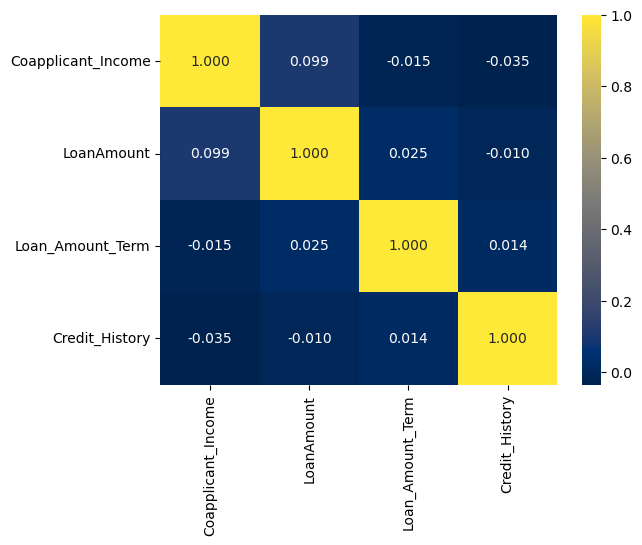

In [55]:
sns.heatmap(correlation, annot=True, cmap='cividis', fmt=".3f")
plt.show()